In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix


%matplotlib inline



In [3]:
df = pd.read_csv('https://bit.ly/2Ehg4Iu')


df.describe()





,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


Infartos em geral 0.59%
Infartos entre hipertensos 0.45%
Infartos entre não hipertensos 0.14%
Infartos entre fumantes 0.17%
Infartos entre não fumantes 0.42%
Infartos em pessoas saudaveis 0.23%
Infartos em pessoas não saudaveis 4.55%
Risco doença em 10 anos em pessoas não saudaveis 54.55%


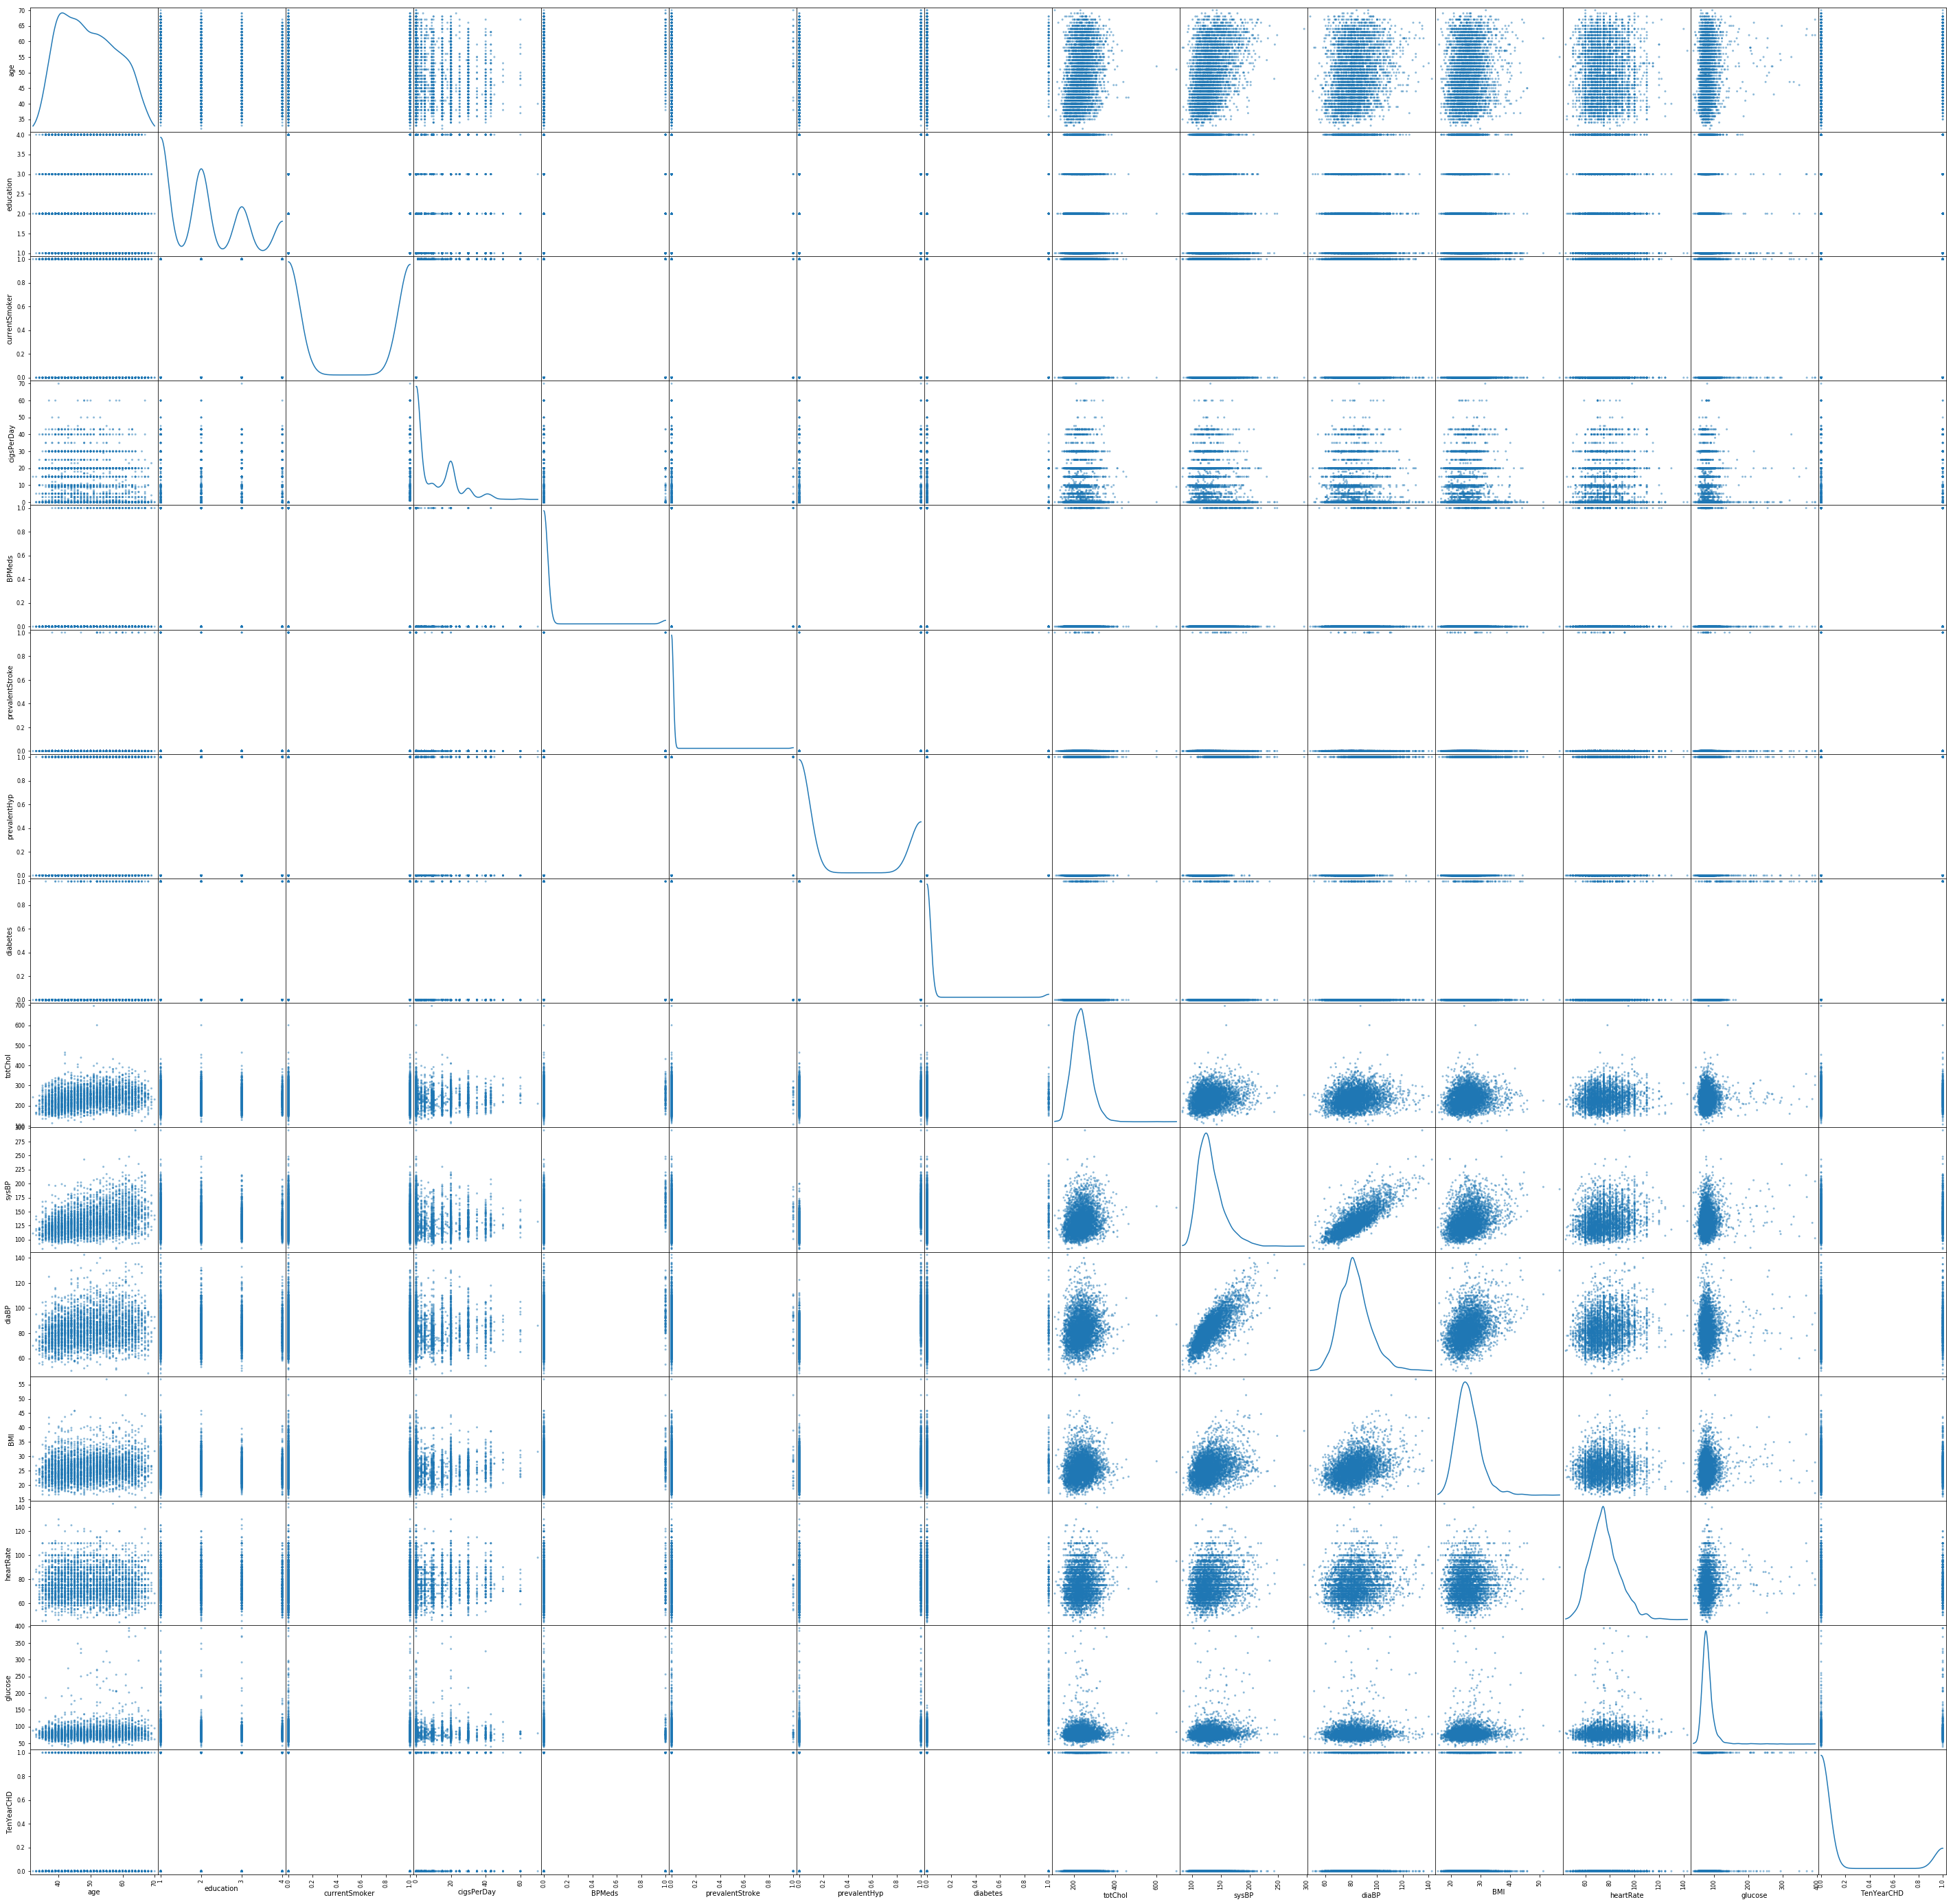

In [5]:
# plot grafico de dispersao

#plt.scatter(cigsPerDay, tenYearCHD)

#df.plot.scatter('age', 'cigsPerDay', c='TenYearCHD', cmap='bwr')

#scatter_matrix(df.loc[:,'cigsPerDay':'totChol'], figsize= (20,20),diagonal='kde')

#imprimindo uma matriz de scatter para procurar alguma correlação adicional
scatter_matrix(df.loc[:,'age':'TenYearCHD'], figsize= (50,50),diagonal='kde')

todos = df
infartos = df.loc[ (df['prevalentStroke'] ==1 )]
hipertenso = df.loc[ (df['prevalentHyp'] ==1 )]
naoHipertenso = df.loc[ (df['prevalentHyp'] ==0 )]
fumantes = df.loc[ (df['currentSmoker'] ==1 )]
fumantesEinfarto = df.loc[ (df['currentSmoker'] ==1 ) 
                              & (df['prevalentStroke'] == 1)]
naoFumantes = df.loc[ (df['currentSmoker'] ==0 )]
naoFumantesEinfarto = df.loc[ (df['currentSmoker'] ==0 ) 
                                 & (df['prevalentStroke'] == 1)]
hipertensoEinfarto = df.loc[ (df['prevalentStroke'] ==1 ) 
                                & (df['prevalentHyp'] == 1)]
naoHipertensoEinfarto = df.loc[ (df['prevalentStroke'] ==1 ) 
                                & (df['prevalentHyp'] == 0)]

print('Infartos em geral {:.2f}%'.format(100*len(infartos)/len(todos)))
print('Infartos entre hipertensos {:.2f}%'.format(100*len(hipertensoEinfarto)/len(todos)))
print('Infartos entre não hipertensos {:.2f}%'.format(100*len(naoHipertensoEinfarto)/len(todos)))
print('Infartos entre fumantes {:.2f}%'.format(100*len(fumantesEinfarto)/len(todos)))
print('Infartos entre não fumantes {:.2f}%'.format(100*len(naoFumantesEinfarto)/len(todos)))

systolicaMax = 129
diastolicaMax = 85

dfPessoasSaudaveis = df.loc[
                (df['prevalentHyp'] == 0) &
                (df['diabetes'] == 0) &
                (df['diaBP'] <= diastolicaMax) &
                (df['sysBP'] <= systolicaMax) &
                (df['glucose'] <= 140) 
                ]

infartosPessoasSaudaveis = dfPessoasSaudaveis.loc[dfPessoasSaudaveis['prevalentStroke'] == 1]

print('Infartos em pessoas saudaveis {:.2f}%'.format(100*len(infartosPessoasSaudaveis)/len(dfPessoasSaudaveis)))

dfPessoasNaoSaudaveis = df.loc[
                (df['prevalentHyp'] == 1) &
                (df['diabetes'] == 1) &
                (df['diaBP'] > diastolicaMax) &
                (df['sysBP'] > systolicaMax) &
                (df['glucose'] > 140) 
                ]
infartosPessoasNaoSaudaveis = dfPessoasNaoSaudaveis.loc[dfPessoasNaoSaudaveis['prevalentStroke'] == 1]
print('Infartos em pessoas não saudaveis {:.2f}%'.format(100*len(infartosPessoasNaoSaudaveis)/len(dfPessoasNaoSaudaveis)))

riscoDoencaEm10AnosPessoasNaoSaudaveis = dfPessoasNaoSaudaveis.loc[dfPessoasNaoSaudaveis['TenYearCHD'] == 1]
print('Risco doença em 10 anos em pessoas não saudaveis {:.2f}%'.format(100*len(riscoDoencaEm10AnosPessoasNaoSaudaveis)/len(dfPessoasNaoSaudaveis)))

dfPessoasNaoSaudaveisRiscoDoencaEm10anos = dfPessoasNaoSaudaveis.loc[dfPessoasNaoSaudaveis['TenYearCHD'] == 1]

#Penso que seria interessante mais dados relacionados ao histórico do uso do cigarro

#A primeira vista ser fumante não influencia tanto quanto manter índices saudáveis
